In [1]:
import scanpy as sc
import sys
import seaborn as sns
from matplotlib import pylab as plt
# import matplotlib.text
import os
import matplotlib.backends.backend_pdf as mpdf
import numpy as np
import pandas as pd

headdir="/oak/stanford/groups/smontgom/amarder/t21-proj"
disease_status="Healthy"
sampletype="Liver"

print("Completed.")



OK.


In [43]:
suffix="subset"
fout="10X_" + disease_status + "_" + sampletype + ".umap."+suffix+".h5ad"
# fout="10X_" + disease_status + "_" + sampletype + ".umap.h5ad"
foutpath=headdir + "/out/data/" + fout
print("\n * Reading in data..." + foutpath)
adata=sc.read_h5ad(foutpath)

myColors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080',
            '#307D7E', '#000000', '#DDEFFF', '#000035', '#7B4F4B', '#A1C299', '#300018', '#C2FF99', '#0AA6D8', '#013349',
            '#00846F', '#8CD0FF', '#3B9700', '#04F757', '#C8A1A1', '#1E6E00', '#DFFB71', '#868E7E', '#513A01', '#CCAA35',
            '#800080', '#DAA520', '#1E90FF', '#3CB371', '#9370DB', '#8FBC8F', '#00FF7F', '#0000CD', '#556B2F', '#FF00FF',
            '#CD853F', '#6B8E23', '#008000', '#6495ED', '#00FF00', '#DC143C', '#FFFF00', '#00FFFF', '#FF4500', '#4169E1',
            '#48D1CC', '#191970', '#9ACD32', '#FFA500', '#00FA9A', '#2E8B57', '#40E0D0', '#D2691E', '#66CDAA', '#FFEFD5',
            '#20B2AA', '#FF0000', '#EEE8AA', '#BDB76B', '#E9967A', '#AFEEEE', '#000080', '#FF8C00', '#B22222', '#5F9EA0',
            '#ADFF2F', '#FFE4B5', '#7B68EE', '#7FFFD4', '#0000FF', '#BA55D3', '#90EE90', '#FFDAB9', '#6A5ACD', '#8B0000',
            '#8A2BE2', '#CD5C5C', '#F08080', '#228B22', '#FFD700', '#006400', '#98FB98', '#00CED1', '#00008B', '#9400D3',
            '#9932CC', '#4B0082', '#F0E68C', '#483D8B', '#008B8B', '#8B008B', '#4682B4']

print("Data read completed.")





 * Reading in data.../oak/stanford/groups/smontgom/amarder/t21-proj/out/data/10X_Healthy_Liver.umap.subset.h5ad
Completed.


In [44]:
if disease_status=="Healthy" and sampletype=="Femur":    
    cell_types_to_remove=["0 (to remove)", 
                          "Osteoblasts,4", 
                          "Megakaryocytes,3"]
    colName="leiden_v7"
elif disease_status=="DownSyndrome" and sampletype=="Femur":
    cell_types_to_remove=["Odd PTPRC+ cells", 
                          "34,0", 
                          "Odd NK cells", 
                          "Pre pro B cells,4"]
    colName="leiden_v12"
elif disease_status=="Healthy" and sampletype=="Liver":
    cell_types_to_remove=["38,0", 
                          "31,0", 
                          "Erythroid cells,2,1", 
                          "34", 
                          "Megakaryocytes,2,0", 
                          "36,1", 
                          "36,0,0", 
                          "36,0,1", 
                          "38,1", 
                          "Megakaryocytes,2,1"]
    colName="leiden_v7"
else:
    print("Error!")

print("\n * Indexing the scanpy object...")
adata=adata[~adata.obs[colName].isin(cell_types_to_remove)]
fout="10X_" + disease_status + "_" + sampletype + ".umap."+suffix+".cells_removed.h5ad"
foutpath=headdir + "/out/data/" + fout
print("\n * Saving data to file..." + foutpath)
adata.write(foutpath)
print("\n * Completed.")


 * Saving data to file.../oak/stanford/groups/smontgom/amarder/t21-proj/out/data/10X_Healthy_Liver.umap.subset.cells_removed.h5ad

 * Completed.


In [48]:
print("\n * Grouping clusters within broad cell types...")
print("\n * Creating dictionary...")
list_of_cell_types=np.unique(adata.obs[[colName]])
celltypeDict={}
broad_cell_type="Erythroid"; old_cell_types="Erythroid"
celltypeDict[broad_cell_type] = [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="Myeloid"; old_cell_types="Neutrophils"
celltypeDict[broad_cell_type] = [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="Myeloid"; old_cell_types="Macrophages"
celltypeDict[broad_cell_type] += [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="Myeloid"; old_cell_types="pDCs"
celltypeDict[broad_cell_type] += [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="Myeloid"; old_cell_types="cDC2"
celltypeDict[broad_cell_type] += [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="Myeloid"; old_cell_types="Kupffer"
celltypeDict[broad_cell_type] += [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="Myeloid"; old_cell_types="Monocyte"
celltypeDict[broad_cell_type] += [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="Myeloid"; old_cell_types="Osteoclasts"
celltypeDict[broad_cell_type] += [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="HSC/Progenitors"; old_cell_types="HSC"
celltypeDict[broad_cell_type] = [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="HSC/Progenitors"; old_cell_types="MPP"
celltypeDict[broad_cell_type] += [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="HSC/Progenitors"; old_cell_types="MEMP"
celltypeDict[broad_cell_type] += [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="HSC/Progenitors"; old_cell_types="Granulocyte"
celltypeDict[broad_cell_type] += [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="B cells"; old_cell_types="B cells"
celltypeDict[broad_cell_type] = [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="Mast cells"; old_cell_types="Mast cells"
celltypeDict[broad_cell_type] = [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="Megakaryocytes"; old_cell_types="Megakaryocytes"
celltypeDict[broad_cell_type] = [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
if disease_status=="DownSyndrome" and sampletype=="Femur":
    broad_cell_type="NK/T cells"; old_cell_types="NK"
    celltypeDict[broad_cell_type] = [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
    broad_cell_type="NK/T cells"; old_cell_types="lymphoid"
    celltypeDict[broad_cell_type] += [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
else:
    broad_cell_type="NK cells"; old_cell_types="NK"
    celltypeDict[broad_cell_type] = [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]

# print(list_of_cell_types)
list_of_used_cell_types=[]
for sublist in list(celltypeDict.values()):
    for item in sublist:
        list_of_used_cell_types.append(item)

list_of_not_used_cell_types=list(set(list_of_cell_types) - set(list_of_used_cell_types))

celltypeDict["Stroma"] = list_of_not_used_cell_types

print(celltypeDict)

print("\n * Saving new cell type labels to 'cell_type_groups' column in the metadata...")
adata.obs["cell_type_groups"] = np.nan
def create_cell_type_groups(row):
    word=row[colName] 
    topiclist = [topic for topic in celltypeDict if word in celltypeDict[topic]]
    return(topiclist[0])

print("\n * About to run create_cell_type_groups...")
adata.obs["cell_type_groups"] = adata.obs.apply(create_cell_type_groups, axis=1)
print("\n * create_cell_type_groups running complete.")
print("\n * New labels created.")


 * Grouping clusters within broad cell types...

 * Creating dictionary...
{'Erythroid': ['Cycling erythroid cells', 'Early erythroid cells'], 'Myeloid': ['Neutrophils', 'Inflammatory macrophages', 'pDCs', 'cDC2', 'Kupffer cells', 'Monocyte progenitors'], 'HSC/Progenitors': ['HSCs/MPPs', 'HSCs/MPPs', 'Cycling MEMPs', 'MEMPs', 'Granulocyte progenitors'], 'B cells': ['B cells', 'Pre pro B cells', 'Pro B cells'], 'Mast cells': ['Mast cells'], 'Megakaryocytes': ['Megakaryocytes'], 'NK cells': ['NK cells', 'NK progenitors'], 'Stroma': ['Hepatocytes', 'LSECs']}

 * Saving new cell type labels to 'cell_type_groups' column in the metadata...

 * About to run create_cell_type_groups...

 * create_cell_type_groups running complete.

 * New labels created.



 * Plotting & saving UMAP.../oak/stanford/groups/smontgom/amarder/t21-proj/out/figures//oak/stanford/groups/smontgom/amarder/t21-proj/out/figures/10X_Healthy_Liver.umap.pdf


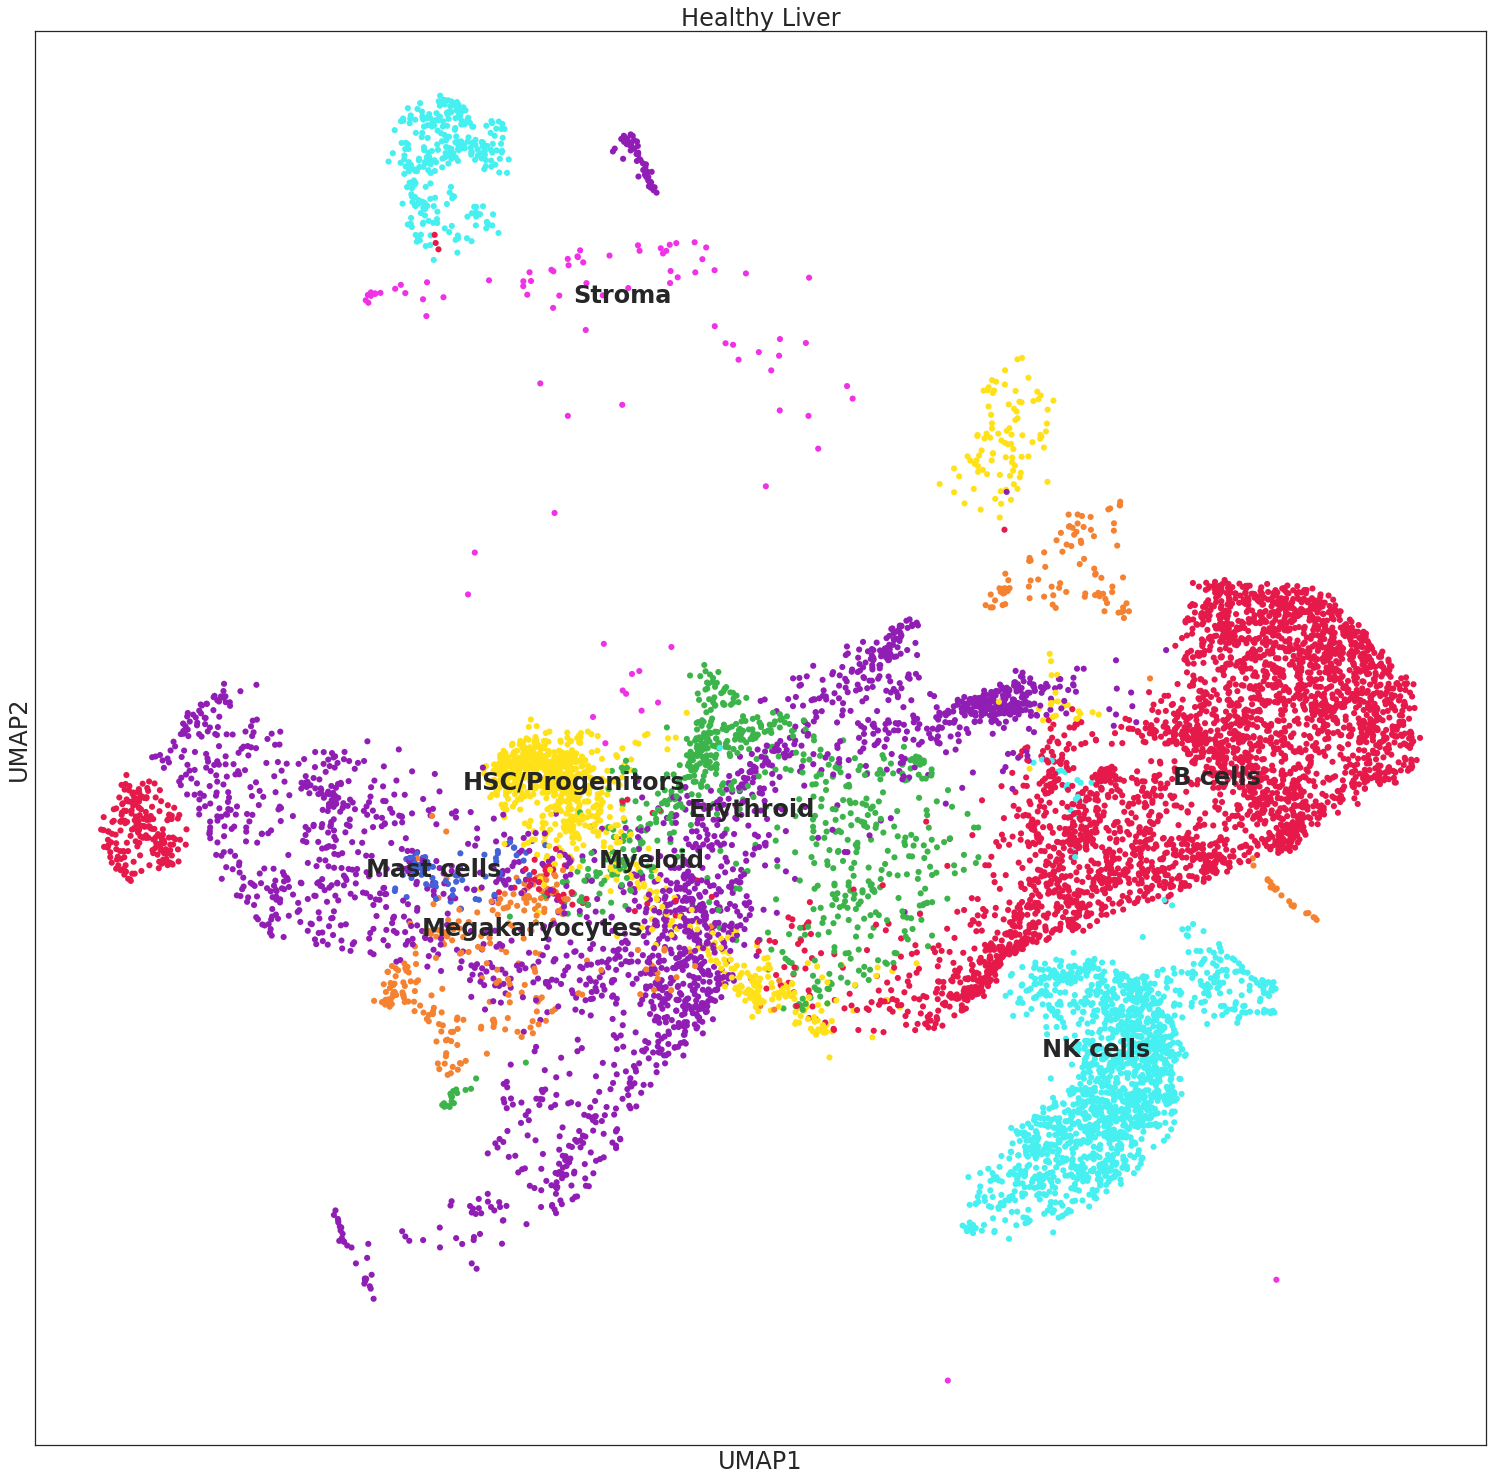


 * Plot saved.

 * Plotting & saving UMAP.../oak/stanford/groups/smontgom/amarder/t21-proj/out/figures//oak/stanford/groups/smontgom/amarder/t21-proj/out/figures/10X_Healthy_Liver.umap.no_legend.pdf


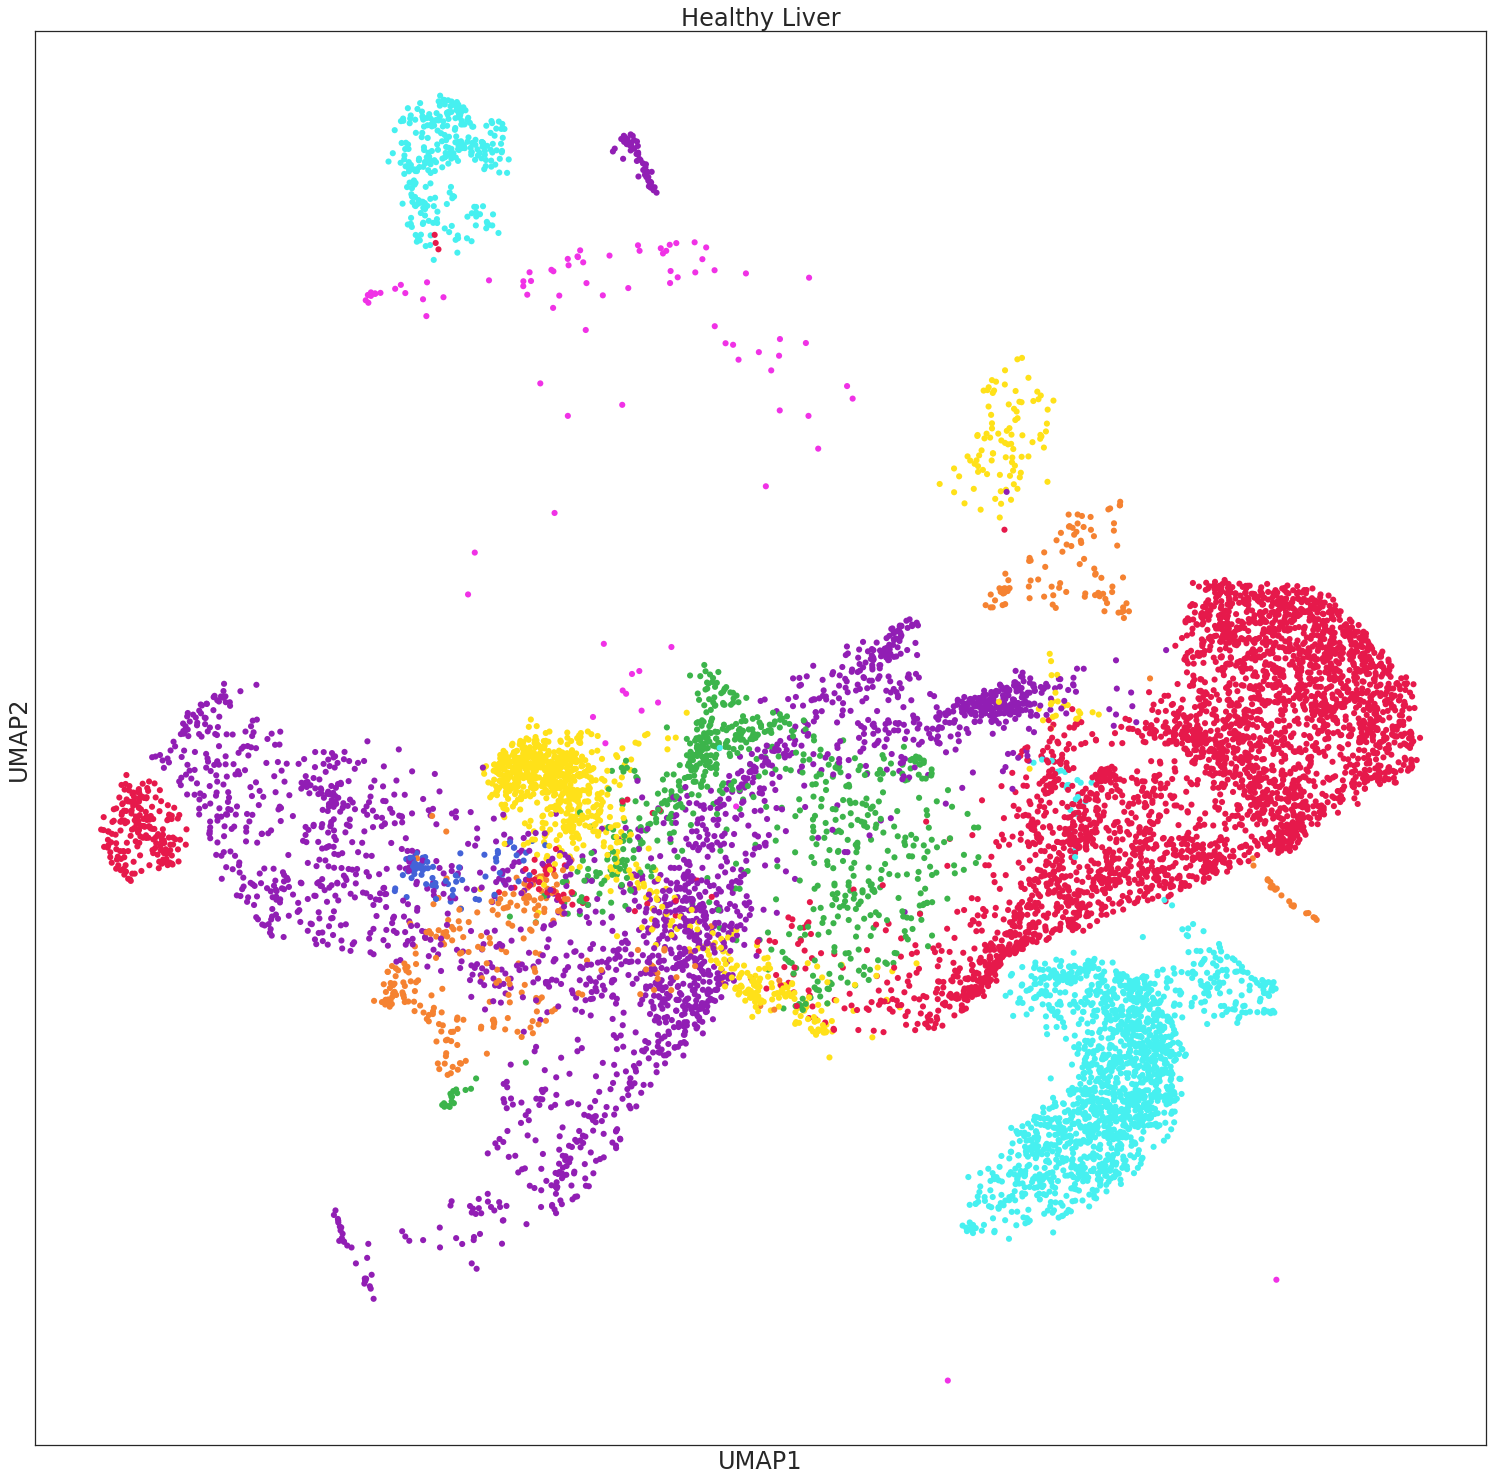


 * Plot saved.


In [77]:
direc=headdir + "/out/figures/"
fplotout=direc + "10X_"+disease_status+"_"+sampletype+".umap.pdf"
print("\n * Plotting & saving UMAP..." + headdir + "/out/figures/"+ fplotout)
f, axs = plt.subplots(1,1,figsize=(26,26))
pdf = mpdf.PdfPages(fplotout)
sns.set(font_scale=2)
sns.set_style("white")
new_plot=sc.pl.umap(adata, color="cell_type_groups", size=150, palette=myColors, components='1,2', ax=axs, show=False, use_raw=False, title=disease_status + ' ' + sampletype,legend_loc="on data")
pdf.savefig()
plt.show()
plt.close()
print("\n * Plot saved.")

fplotout=direc + "10X_"+disease_status+"_"+sampletype+".umap.no_legend.pdf"
print("\n * Plotting & saving UMAP..." + headdir + "/out/figures/"+ fplotout)
f, axs = plt.subplots(1,1,figsize=(26,26))
pdf = mpdf.PdfPages(fplotout)
sns.set(font_scale=2)
sns.set_style("white")
new_plot=sc.pl.umap(adata, color="cell_type_groups", size=150, palette=myColors, components='1,2', ax=axs, show=False, use_raw=False, title=disease_status + ' ' + sampletype,legend_loc="None")
pdf.savefig()
plt.show()
plt.close()
print("\n * Plot saved.")




 * Plotting & saving UMAP.../oak/stanford/groups/smontgom/amarder/t21-proj/out/figures//oak/stanford/groups/smontgom/amarder/t21-proj/out/figures/10X_Healthy_Liver.dotplot.pdf


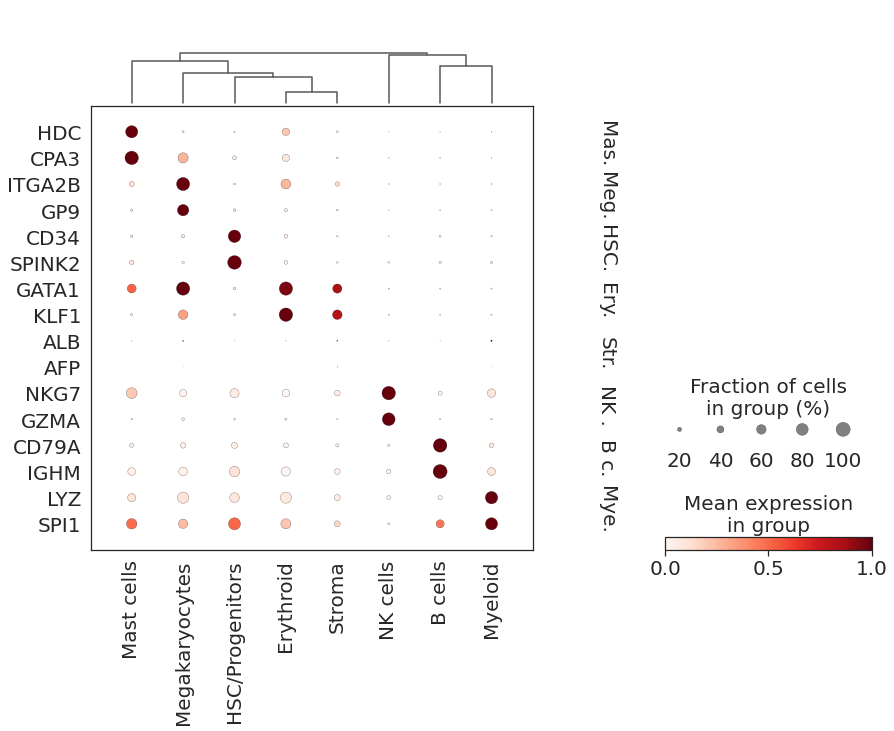


 * Plot saved.


In [67]:
markerDict= {'HSC/Progenitors' : ['CD34', 'SPINK2'],
    'Erythroid' : ['GATA1', 'KLF1'],
    'Mast cells' : ['HDC', 'CPA3'],
    'Megakaryocytes' : ['ITGA2B', 'GP9'],
    'Myeloid' :[ 'LYZ', 'SPI1'],
    'NK cells' : ['NKG7', 'GZMA'],
    'B cells' : ['CD79A', 'IGHM'],
    'Stroma' : ['ALB', 'AFP']}

fplotout=direc + "10X_"+disease_status+"_"+sampletype+".dotplot.pdf"
print("\n * Plotting & saving UMAP..." + headdir + "/out/figures/"+ fplotout)
f, axs = plt.subplots(1,1,figsize=(14,10))
pdf = mpdf.PdfPages(fplotout)
# sns.set(font_scale=2)
# sns.set_style("white")
# new_plot=
sc.pl.dotplot(adata,
                   markerDict,
                   groupby="cell_type_groups",
                   standard_scale='var',
                   smallest_dot=0.0,
                   dot_min=None,
                   dot_max=None,
                   color_map='Reds',
                   dendrogram=True,
#                    figsize=(12,15),
                   show=False,
                   ax=axs,
                   linewidths=2,swap_axes=True)
pdf.savefig()
plt.show()
plt.close()
print("\n * Plot saved.")




In [78]:
import pandas as pd
pd.set_option('display.max_rows', None)
cluster_to_label_mapping=adata.obs[["leiden","leiden_v7","cell_type_groups"]].drop_duplicates().sort_values("leiden")
fout="10X_" + disease_status + "_" + sampletype + ".cluster_to_label_mapping.csv"
# fout="10X_" + disease_status + "_" + sampletype + ".umap.h5ad"
foutpath=headdir + "/out/data_small/" + fout
print("\n * Saving cluster_to_label_mapping: " + foutpath)
cluster_to_label_mapping.to_csv(foutpath)
print(cluster_to_label_mapping.to_string(index=False))
pd.set_option('display.max_rows', 10)
print("Done")


 * Saving cluster_to_label_mapping: /oak/stanford/groups/smontgom/amarder/t21-proj/out/data_small/10X_Healthy_Liver.cluster_to_label_mapping.csv
leiden                 leiden_v7 cell_type_groups
     0               Hepatocytes           Stroma
     3               Hepatocytes           Stroma
     4                   B cells          B cells
     5                     LSECs           Stroma
     6                  NK cells         NK cells
     7                      cDC2          Myeloid
     8               Hepatocytes           Stroma
     9             Kupffer cells          Myeloid
    10   Cycling erythroid cells        Erythroid
    11                Mast cells       Mast cells
    11           Pre pro B cells          B cells
    11     Early erythroid cells        Erythroid
    11             Cycling MEMPs  HSC/Progenitors
    11                     MEMPs  HSC/Progenitors
    12      Monocyte progenitors          Myeloid
    12               Neutrophils          Myeloid
    